In [69]:
setwd('/import/DB/fel/BJTC-204')

In [70]:
library(circlize)

### model geen cor

In [71]:
library(dplyr)

In [78]:
data = readRDS('./remove.repeat.sample.rds')

In [79]:
head(data,2)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431804,0,Control,6.3,F,Asian,47,GSM2431804,6.831036,6.173794,7.760346,...,8.542607,8.301062,6.896081,4.490684,6.003487,4.956644,7.644263,7.408029,5.906133,5.876785
GSM2432040,0,Control,6.4,M,African American,59,GSM2432040,6.172921,5.700313,7.810127,...,8.878981,8.587653,6.628235,4.374113,5.297534,4.864552,7.318215,7.543359,5.863712,5.981731


In [74]:
model.gene = c('MUS81','UCK2','CNIH3','OTUD4')

In [75]:
sample = data[,model.gene] %>%  t() %>%  as.data.frame()

In [76]:
sample

,GSM2431804,GSM2432040,GSM2432045,GSM2431943,GSM2431991,GSM2432005,GSM2432041,GSM2431769,GSM2431857,GSM2432016,...,GSM2432036,GSM2432007,GSM2431970,GSM2432037,GSM2431770,GSM2431977,GSM2431867,GSM2431941,GSM2432086,GSM2432052
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MUS81,7.186950,7.222434,7.214975,6.814897,6.776126,7.318605,7.072539,7.297656,7.156295,7.439232,...,7.301537,7.490196,7.162633,7.105128,7.144287,7.419060,7.435199,7.337007,7.298250,7.336445
UCK2,5.880995,5.948978,6.192500,5.733516,5.799063,5.771423,6.028952,6.189930,6.005445,6.065371,...,6.030122,5.879378,5.694272,5.929617,5.829025,6.113895,5.950425,6.063181,5.998178,6.183452
CNIH3,4.981719,5.904046,5.836701,5.376359,5.408538,5.357614,5.520831,4.740421,5.066182,5.034199,...,5.520265,5.366293,6.226637,5.549689,5.873688,5.175450,5.605910,5.373413,5.591462,4.951035
OTUD4,4.965513,5.005647,4.942615,5.207084,4.885527,5.423843,5.103678,4.996832,4.988668,4.982266,...,5.084999,5.006363,5.255686,5.073413,5.092863,5.009574,5.129475,5.002767,4.999804,5.011582


,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,UCK2,MUS81,0.4368735
3,CNIH3,MUS81,-0.2594513
4,OTUD4,MUS81,-0.1168776
5,MUS81,UCK2,0.4368735
7,CNIH3,UCK2,-0.2010327
8,OTUD4,UCK2,-0.1743444


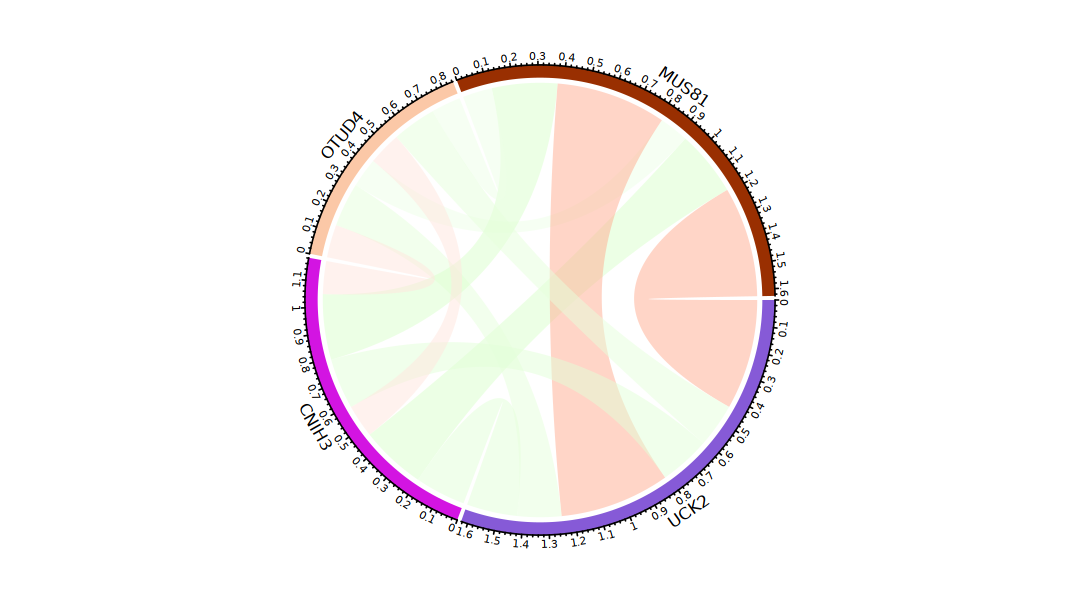

In [80]:
gene <- t(sample)
gene_cor <- cor(gene, method = 'spearman')
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)
chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    #grid.col = c(GABRD = 'green3', PLVAP = 'red', CDKN3 = 'orange', CDC25C = 'purple', UBE2T = 'skyblue', SKA1 = 'blue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), )#名称离圆弧的距离，以及圆弧的宽度

### 疾病于正常

[1] "TYPE"  "MUS81" "UCK2"  "CNIH3" "OTUD4"

,TYPE,gene,Expression
,<chr>,<chr>,<dbl>
1,Control,MUS81,7.186950
2,Control,MUS81,7.222434


gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
MUS81,Expression,Control,MDD,0.001611105,0.0064,0.0016,**,T-test
UCK2,Expression,Control,MDD,0.021686774,0.0510,0.0217,*,T-test
CNIH3,Expression,Control,MDD,0.017105224,0.0510,0.0171,*,T-test
OTUD4,Expression,Control,MDD,0.018854025,0.0510,0.0189,*,T-test


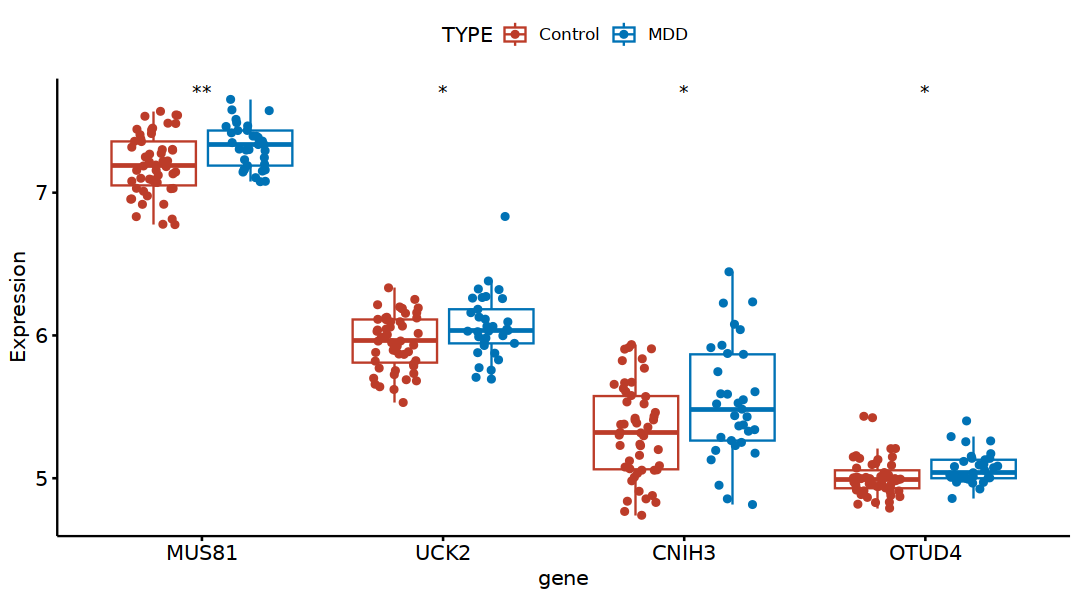

In [81]:
expr1 = data[,c('TYPE',model.gene)]

colnames(expr1)

require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

mydata<-expr1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",MUS81:OTUD4) %>% 
  ##
  dplyr::select(TYPE,gene,Expression) 

head(mydata,2)

compare_means( Expression ~ TYPE, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "TYPE", y = "Expression",
          color = "TYPE", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "TYPE", palette = "nejm",
          add = "jitter")

diffgene = as.data.frame(compare_means( Expression ~ TYPE, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
write.csv(diffgene,file = 'diffgene.csv')
options(repr.plot.height = 5,repr.plot.width = 9)

p + stat_compare_means(aes(group = TYPE), label = "p.signif",method = 't.test')

In [50]:
head(data,2)

,TYPE,PH,Gender,race,Age,death,SUBJECT,TOD,Toxicology,subject,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Control,6.3,F,Asian,47,0,38,14.85,,105976,...,-0.006100768,-0.06413887,0.003604848,-0.03154435,0.00000814,-0.001946376,0.01816731,0.080291777,0.2381181,-0.094266320
3,Control,6.4,M,African American,59,0,3,0.92,,108022,...,0.234293937,-0.09116396,-0.046397010,0.12719771,-0.55944968,-0.033907364,-0.15330880,0.000730584,-0.1974440,0.000730584


[1] "Gender" "MUS81"  "UCK2"   "CNIH3"  "OTUD4"

,Gender,gene,Expression
,<chr>,<chr>,<dbl>
1,F,MUS81,7.186950
2,M,MUS81,7.222434


gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
MUS81,Expression,F,M,0.527095438,0.530,0.5271,ns,T-test
UCK2,Expression,F,M,0.093500896,0.280,0.0935,ns,T-test
CNIH3,Expression,F,M,0.005522805,0.022,0.0055,**,T-test
OTUD4,Expression,F,M,0.165749569,0.330,0.1657,ns,T-test


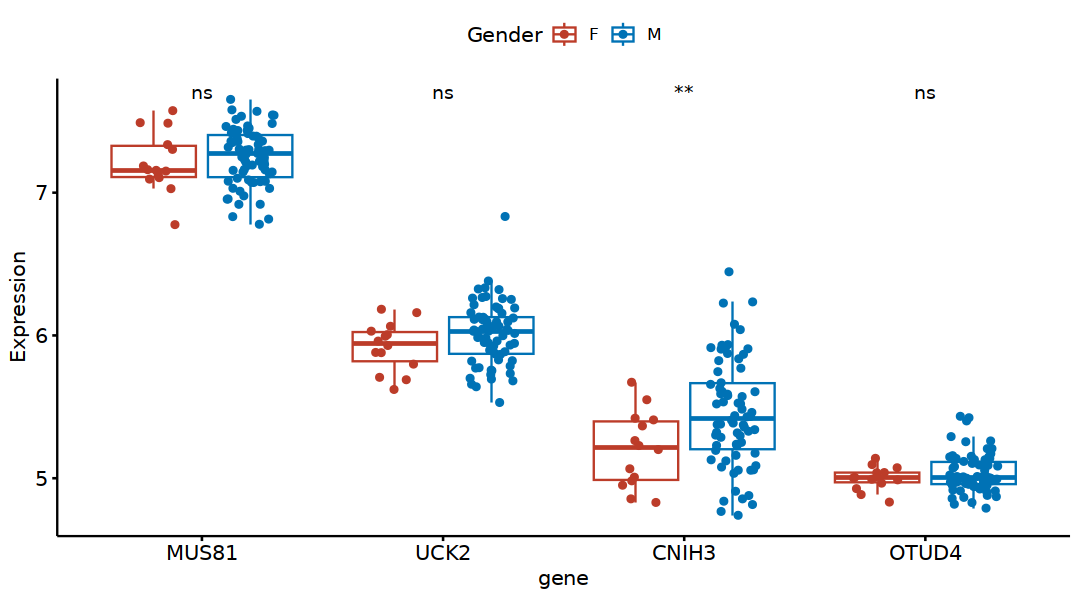

In [82]:
expr1 = data[,c('Gender',model.gene)]

colnames(expr1)

require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

mydata<-expr1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",MUS81:OTUD4) %>% 
  ##
  dplyr::select(Gender,gene,Expression) 

head(mydata,2)

compare_means( Expression ~ Gender, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Gender", y = "Expression",
          color = "Gender", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Gender", palette = "nejm",
          add = "jitter")

diffgene = as.data.frame(compare_means( Expression ~ Gender, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
write.csv(diffgene,file = 'diffgene.gender.csv')
options(repr.plot.height = 5,repr.plot.width = 9)

p + stat_compare_means(aes(group = Gender), label = "p.signif",method = 't.test')

In [83]:
data$year = ifelse(data$Age > 60 ,'old','young')

[1] "year"  "MUS81" "UCK2"  "CNIH3" "OTUD4"

,year,gene,Expression
,<chr>,<chr>,<dbl>
1,young,MUS81,7.186950
2,young,MUS81,7.222434


gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
MUS81,Expression,young,old,0.2909501126,0.580,0.29095,ns,T-test
UCK2,Expression,young,old,0.0057784295,0.017,0.00578,**,T-test
CNIH3,Expression,young,old,0.6502821124,0.650,0.65028,ns,T-test
OTUD4,Expression,young,old,0.0007420838,0.003,0.00074,***,T-test


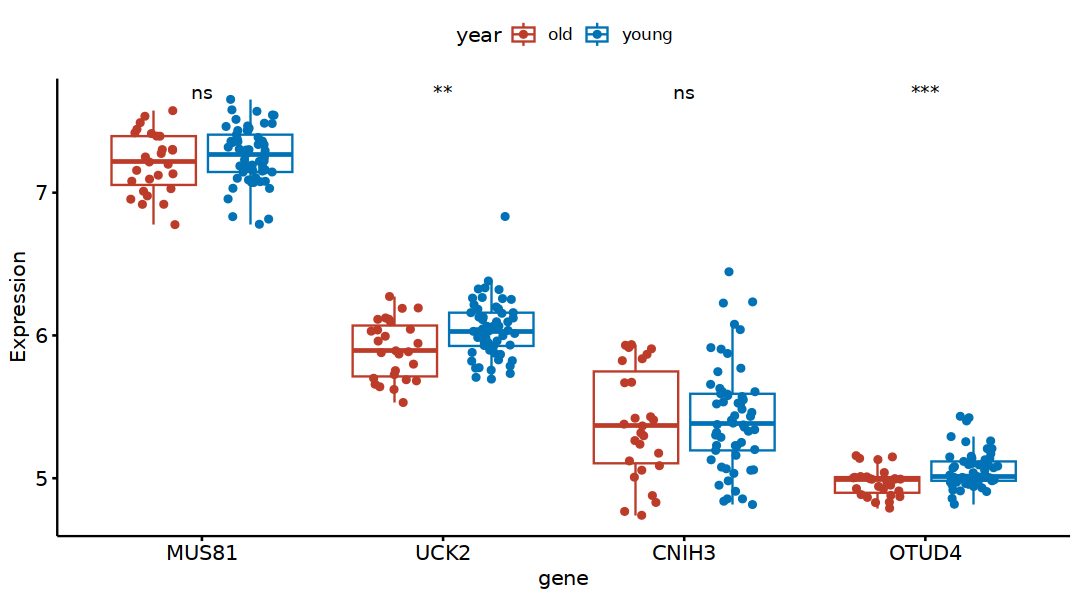

In [84]:
expr1 = data[,c('year',model.gene)]

colnames(expr1)

require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

mydata<-expr1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",MUS81:OTUD4) %>% 
  ##
  dplyr::select(year,gene,Expression) 

head(mydata,2)

compare_means( Expression ~ year, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "year", y = "Expression",
          color = "year", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "year", palette = "nejm",
          add = "jitter")

diffgene = as.data.frame(compare_means( Expression ~ year, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
write.csv(diffgene,file = 'diffgene.year.csv')
options(repr.plot.height = 5,repr.plot.width = 9)

p + stat_compare_means(aes(group = year), label = "p.signif",method = 't.test')

In [85]:
saveRDS(data,file = 'all.data.rds')

### 描述這幾個基因的特征

In [56]:
library("enrichR")

Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [57]:
websiteLive <- getOption("enrichR.live")
if (websiteLive) {
    listEnrichrSites()
    setEnrichrSite("Enrichr") # Human genes   
}

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



In [61]:
if (websiteLive) dbs <- listEnrichrDbs()

In [63]:
dbs$libraryName

[1] "Genome_Browser_PWMs"                               
  [2] "TRANSFAC_and_JASPAR_PWMs"                          
  [3] "Transcription_Factor_PPIs"                         
  [4] "ChEA_2013"                                         
  [5] "Drug_Perturbations_from_GEO_2014"                  
  [6] "ENCODE_TF_ChIP-seq_2014"                           
  [7] "BioCarta_2013"                                     
  [8] "Reactome_2013"                                     
  [9] "WikiPathways_2013"                                 
 [10] "Disease_Signatures_from_GEO_up_2014"               
 [11] "KEGG_2013"                                         
 [12] "TF-LOF_Expression_from_GEO"                        
 [13] "TargetScan_microRNA"                               
 [14] "PPI_Hub_Proteins"                                  
 [15] "GO_Molecular_Function_2015"                        
 [16] "GeneSigDB"                                         
 [17] "Chromosome_Location"                               
 [18] "Human_Gene_Atlas"                                  
 [19] "Mouse_Gene_Atlas"                                  
 [20] "GO_Cellular_Component_2015"                        
 [21] "GO_Biological_Process_2015"                        
 [22] "Human_Phenotype_Ontology"                          
 [23] "Epigenomics_Roadmap_HM_ChIP-seq"                   
 [24] "KEA_2013"                                          
 [25] "NURSA_Human_Endogenous_Complexome"                 
 [26] "CORUM"                                             
 [27] "SILAC_Phosphoproteomics"                           
 [28] "MGI_Mammalian_Phenotype_Level_3"                   
 [29] "MGI_Mammalian_Phenotype_Level_4"                   
 [30] "Old_CMAP_up"                                       
 [31] "Old_CMAP_down"                                     
 [32] "OMIM_Disease"                                      
 [33] "OMIM_Expanded"                                     
 [34] "VirusMINT"                                         
 [35] "MSigDB_Computational"                              
 [36] "MSigDB_Oncogenic_Signatures"                       
 [37] "Disease_Signatures_from_GEO_down_2014"             
 [38] "Virus_Perturbations_from_GEO_up"                   
 [39] "Virus_Perturbations_from_GEO_down"                 
 [40] "Cancer_Cell_Line_Encyclopedia"                     
 [41] "NCI-60_Cancer_Cell_Lines"                          
 [42] "Tissue_Protein_Expression_from_ProteomicsDB"       
 [43] "Tissue_Protein_Expression_from_Human_Proteome_Map" 
 [44] "HMDB_Metabolites"                                  
 [45] "Pfam_InterPro_Domains"                             
 [46] "GO_Biological_Process_2013"                        
 [47] "GO_Cellular_Component_2013"                        
 [48] "GO_Molecular_Function_2013"                        
 [49] "Allen_Brain_Atlas_up"                              
 [50] "ENCODE_TF_ChIP-seq_2015"                           
 [51] "ENCODE_Histone_Modifications_2015"                 
 [52] "Phosphatase_Substrates_from_DEPOD"                 
 [53] "Allen_Brain_Atlas_down"                            
 [54] "ENCODE_Histone_Modifications_2013"                 
 [55] "Achilles_fitness_increase"                         
 [56] "Achilles_fitness_decrease"                         
 [57] "MGI_Mammalian_Phenotype_2013"                      
 [58] "BioCarta_2015"                                     
 [59] "HumanCyc_2015"                                     
 [60] "KEGG_2015"                                         
 [61] "NCI-Nature_2015"                                   
 [62] "Panther_2015"                                      
 [63] "WikiPathways_2015"                                 
 [64] "Reactome_2015"                                     
 [65] "ESCAPE"                                            
 [66] "HomoloGene"                                        
 [67] "Disease_Perturbations_from_GEO_down"               
 [68] "Disease_Perturbations_from_GEO_up"        

In [64]:
dbs <- c("DSigDB",'GO_Biological_Process_2023','DGIdb_Drug_Targets_2024')
if (websiteLive) {
    enriched <- enrichr(c('MUS81','UCK2','CNIH3','OTUD4'), dbs)
}

Uploading data to Enrichr... Done.
  Querying DSigDB... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying DGIdb_Drug_Targets_2024... Done.
Parsing results... Done.


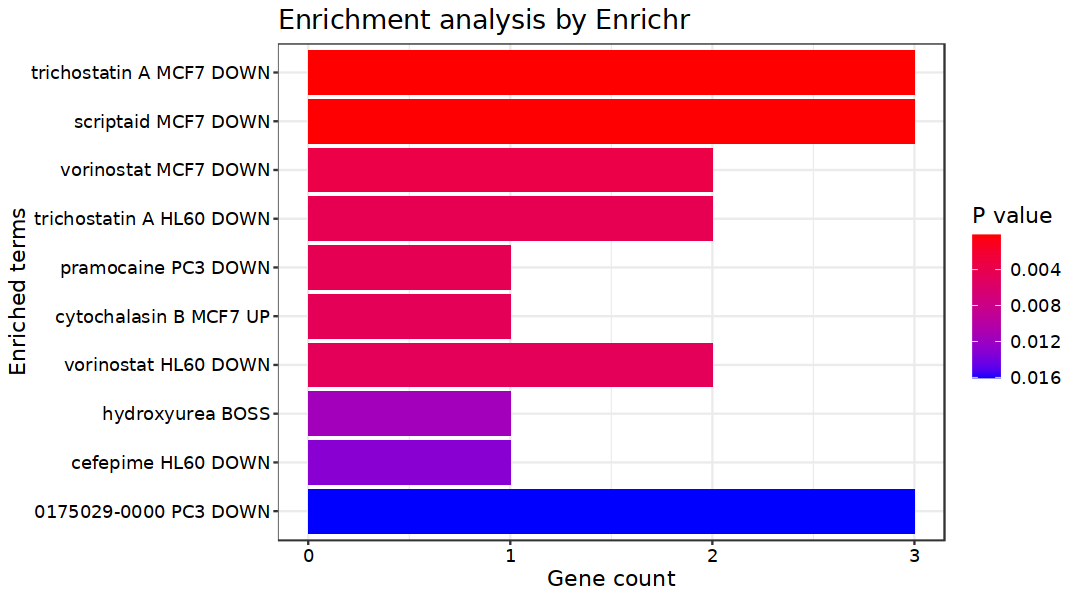

In [65]:
if (websiteLive) {
    plotEnrich(enriched[[1]], showTerms = 10, numChar = 40, y = "Genes", orderBy = "P.value")+ theme(text=element_text(size= 13 ))
}

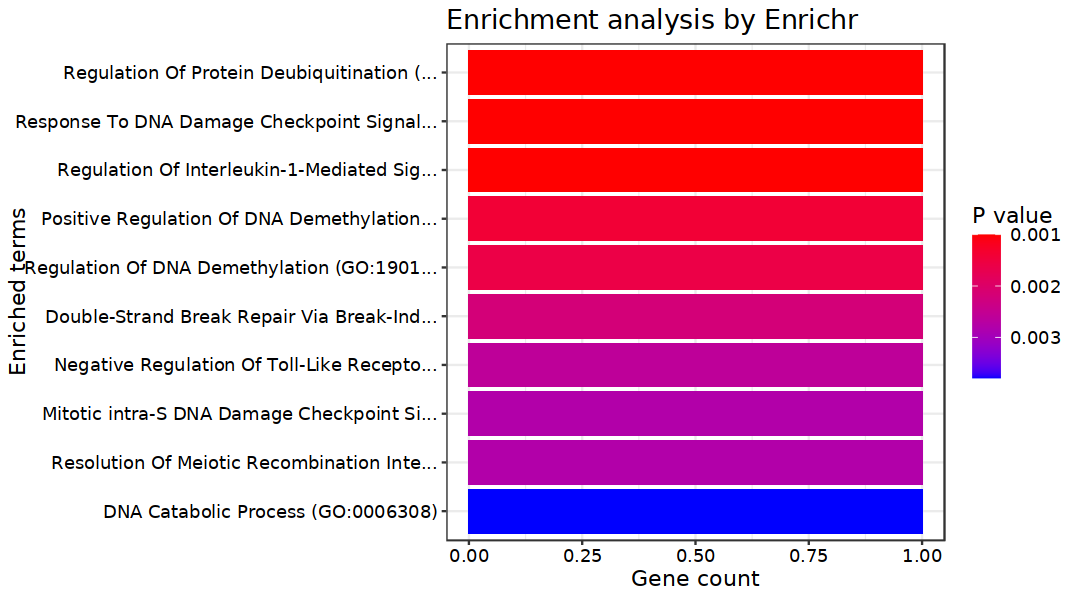

In [66]:
if (websiteLive) {
    plotEnrich(enriched[[2]], showTerms = 10, numChar = 40, y = "Genes", orderBy = "P.value")+ theme(text=element_text(size= 13 ))
}

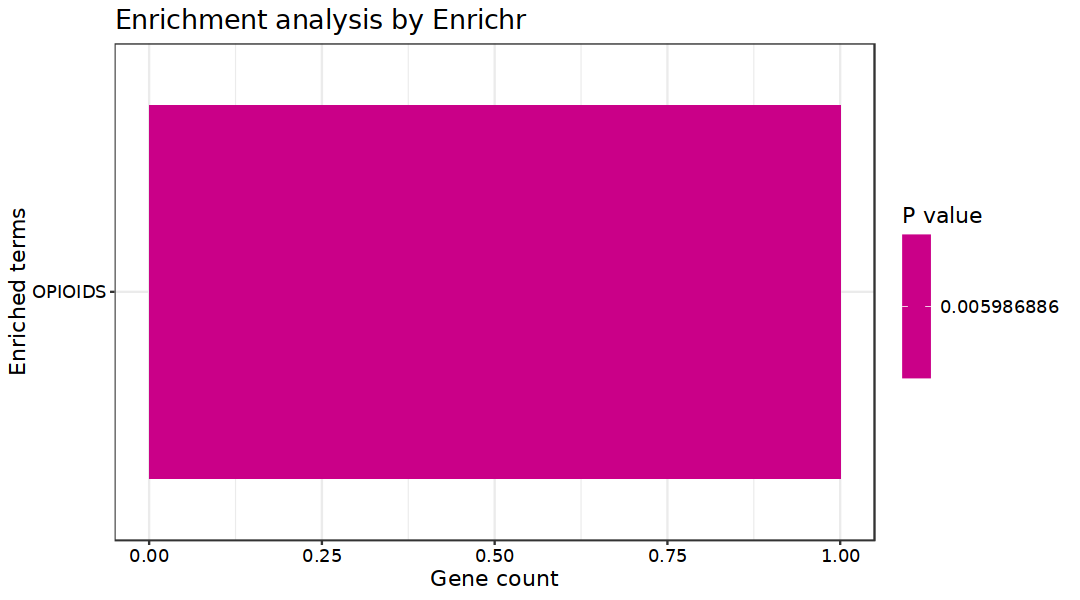

In [68]:
if (websiteLive) {
    plotEnrich(enriched[[3]], showTerms = 10, numChar = 40, y = "Genes", orderBy = "P.value")+ theme(text=element_text(size= 13 ))
}